In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fulldata = pd.read_csv(r'../movie_data2.csv')
fulldata.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,...,Drama,Family,Adventure,Music,Western,Musical,War,History,Mystery,Horror
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,...,0,0,0,0,0,0,0,0,1,1
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,...,0,0,0,0,0,0,0,0,0,1
2,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,...,0,0,0,0,0,0,0,0,0,1
3,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,...,0,0,0,0,0,0,0,0,1,1
4,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,...,1,0,0,0,0,0,0,0,0,0


# Data Check

In [3]:
genreList = []
for el in fulldata['genres'].map(lambda x: str(x).split(",")):
    for el2 in el:
        genreList.append(el2)
genreCols = list(set(genreList))
genreCols

['Drama',
 'Documentary',
 'Crime',
 'Mystery',
 'Biography',
 'Comedy',
 'Adventure',
 'War',
 'Musical',
 'Music',
 'Reality-TV',
 'Family',
 'Fantasy',
 'Romance',
 'Thriller',
 'Action',
 'Western',
 'Sport',
 'History',
 'Horror',
 'Animation',
 'Sci-Fi']

In [4]:
genreCols_df = fulldata[[el for el in genreCols]]

In [5]:
check_df = pd.concat([fulldata['genres'],genreCols_df], axis=1)
check_df.head()

,genres,Drama,Documentary,Crime,Mystery,Biography,Comedy,Adventure,War,Musical,...,Fantasy,Romance,Thriller,Action,Western,Sport,History,Horror,Animation,Sci-Fi
0,"Horror,Mystery,Thriller",0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,Horror,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Horror,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"Horror,Mystery,Thriller",0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,Drama,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Bar Plot 1

In [6]:
fulldata[[el for el in genreCols]].head()

,Drama,Documentary,Crime,Mystery,Biography,Comedy,Adventure,War,Musical,Music,...,Fantasy,Romance,Thriller,Action,Western,Sport,History,Horror,Animation,Sci-Fi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
piv0 = pd.DataFrame((pd.pivot_table(fulldata, index=['roi_category'], values =fulldata[[el for el in genreCols]], aggfunc='sum')).stack())
piv0.columns = ['genreCount']
piv0

genreCount
roi_category                         
high          Action               60
              Adventure            58
              Animation            23
              Biography            31
              Comedy              105
              Crime                27
              Documentary           8
              Drama               151
              Family               13
              Fantasy              22
              History               6
              Horror               59
              Music                14
              Musical               4
              Mystery              48
              Reality-TV            0
              Romance              48
              Sci-Fi               39
              Sport                 4
              Thriller             67
              War                   1
              Western               1
low           Action               72
              Adventure            22
              Animation             6
              Biography            25
              Comedy               81
              Crime                46
              Documentary          18
              Drama               165
...                               ...
somewhat high Mystery              19
              Reality-TV            0
              Romance              36
              Sci-Fi               29
              Sport                 4
              Thriller             48
              War                   2
              Western               1
somewhat low  Action              105
              Adventure            68
              Animation            12
              Biography            31
              Comedy               88
              Crime                62
              Documentary           8
              Drama               169
              Family               21
              Fantasy              31
              History               9
              Horror               31
              Music                11
              Musical               1
              Mystery              22
              Reality-TV            0
              Romance              39
              Sci-Fi               23
              Sport                11
              Thriller             45
              War                   4
              Western               3

[110 rows x 1 columns]

In [8]:
genreRank0 = pd.DataFrame(fulldata[[el for el in genreCols]].sum()).sort_values(0, ascending=False).reset_index()
genreRank0.index.name = "genreRank"
genreRank0.columns = ['genres','count']
genreRank0.reset_index(inplace=True)
genreRank0

,genreRank,genres,count
0,0,Drama,734
1,1,Comedy,515
2,2,Action,448
3,3,Adventure,350
4,4,Thriller,265
5,5,Crime,233
6,6,Romance,188
7,7,Horror,184
8,8,Biography,135
9,9,Sci-Fi,134


In [9]:
piv2 = piv0.div(304) *100
piv2.head()

genreCount
roi_category                      
high         Action      19.736842
             Adventure   19.078947
             Animation    7.565789
             Biography   10.197368
             Comedy      34.539474

In [11]:
viz1 = pd.DataFrame(piv2)
viz1.reset_index(inplace=True)
viz1.columns = ['roi_category', 'genres', '% of total by roi_cat']

In [12]:
viz1['r'] = viz1['roi_category'].apply(lambda x: {'high':0, 'somewhat high':1, 'moderate':2, 'somewhat low':3, 'low':4}[x])
viz1.head()

,roi_category,genres,% of total by roi_cat,r
0,high,Action,19.736842,0
1,high,Adventure,19.078947,0
2,high,Animation,7.565789,0
3,high,Biography,10.197368,0
4,high,Comedy,34.539474,0


In [13]:
viz2 = viz1.merge(genreRank0, on='genres')
viz2['roi_category2'] = viz2['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
viz2['roi_category3'] = viz2['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])
viz2

,roi_category,genres,% of total by roi_cat,r,genreRank,count,roi_category2,roi_category3
0,high,Action,19.736842,0,2,448,high,high
1,low,Action,23.684211,4,2,448,other,low
2,moderate,Action,33.552632,2,2,448,other,NaN
3,somewhat high,Action,35.855263,1,2,448,other,NaN
4,somewhat low,Action,34.539474,3,2,448,other,NaN
5,high,Adventure,19.078947,0,3,350,high,high
6,low,Adventure,7.236842,4,3,350,other,low
7,moderate,Adventure,28.947368,2,3,350,other,NaN
8,somewhat high,Adventure,37.500000,1,3,350,other,NaN
9,somewhat low,Adventure,22.368421,3,3,350,other,NaN


In [14]:
viz2.sort_values(by=['r','genreRank'], inplace=True)

In [17]:
viz3 = viz2.loc[(viz2.genres == 'Biography') \
         | (viz2.genres == 'Drama') \
         | (viz2.genres == 'Crime')]

In [19]:
sns.set_context('poster')

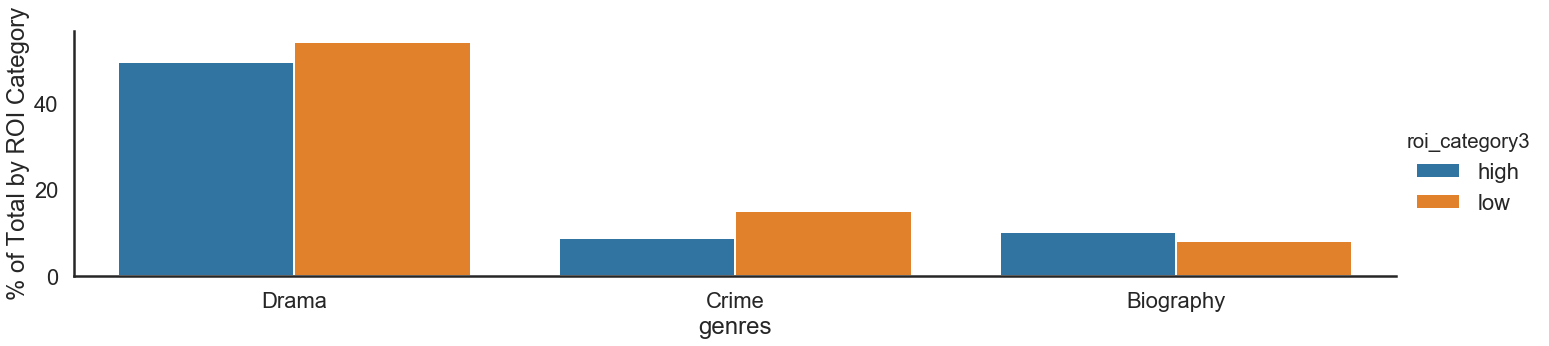

In [20]:
viz3s = sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category3', data=viz3, kind='bar', aspect=4);
sns.set_style("white")
viz3s.set(ylabel="% of Total by ROI Category");

In [ ]:
viz2sa = sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category2', data=viz2, kind='bar', aspect=4);
sns.set_style("white");
viz2sa.set(ylabel="% of Total by ROI Category");

In [ ]:
viz2sb = sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category3', data=viz2, kind='bar', aspect=4);
sns.set_style("white");
viz2sb.set(ylabel="% of Total by ROI Category");

# Top Genres

In [ ]:
viz3a = viz2.loc[viz2.roi_category=='high'].nlargest(10,'% of total by roi_cat')
viz3a.reset_index(inplace=True)
viz3a

In [ ]:
viz3b = viz2.loc[viz2.roi_category=='low'].nlargest(10,'% of total by roi_cat')
viz3b.reset_index(inplace=True)
viz3b

In [ ]:
viz3 = viz3a.merge(viz3b, left_index=True, right_index=True, suffixes=('_high','_low'))
viz3 = viz3[['genres_high','% of total by roi_cat_high','genres_low','% of total by roi_cat_low']]
viz3

# Graveyard

In [ ]:
piv3 = pd.DataFrame((pd.pivot_table(fulldata, index=['roi_category'], values =fulldata[[el for el in genreCols]], aggfunc='sum')).stack())
piv3.reset_index(inplace=True)
piv3['r'] = piv3['roi_category'].apply(lambda x: {'high':0, 'somewhat high':1, 'moderate':2, 'somewhat low':3, 'low':4}[x])
piv3.sort_values(by=['r',0], ascending=[True,False], inplace=True)
piv3['roi_category2'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
piv3['roi_category3'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])
piv3.columns=['roi_category', 'genre', 'count', 'r', 'roi_category2', 'roi_category3']
piv3.reset_index(inplace=True)
piv3